In [1]:
import numpy as np
import glob
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

# cm inch transfer for matplotlib
def cm2inch(*tupl):
    inch = 2.54
    return tuple(i/inch for i in tupl)

In [2]:
# cases
varnames = np.array(['ZMean_average', 'ZPrime2Mean_average', 'chiMean_average'])
cases = np.array([4, 8, 10, 20])
linecolor = ['tab:blue', 'tab:red', 'tab:green','k']
linestyle = ['--','-.',':','-']
locs = np.array([70, 50, 30, 20, 10])
folderNamePrefix = 'SwBd_Dq56_44M_FLAMELET_LUST_Linear_Sct07_FUEL'

In [3]:
# plot
# figure and axes parameters
# total width is fixed
plot_width      =19.0
margin_left     =1.6
margin_right    =0.1
margin_bottom   =1.2
margin_top      =0.8
space_width     =1.8
space_height    =0.5
ftsize          =11

font = {'family':'serif',
        'weight':'normal',
        'size':ftsize}

# use TEX for interpreter
plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=[r'\usepackage{amsmath}',r'\usepackage{bm}'])
# use serif font
plt.rc('font',**font)

ncols = 3
nrows = locs.size

subplot_width = (plot_width
                -margin_left
                -margin_right
                -(ncols-1)*space_width)/ncols
subplot_height = subplot_width * 0.4

plot_height = (nrows*subplot_height
              +margin_bottom
              +margin_top
              +(nrows-1)*space_height)

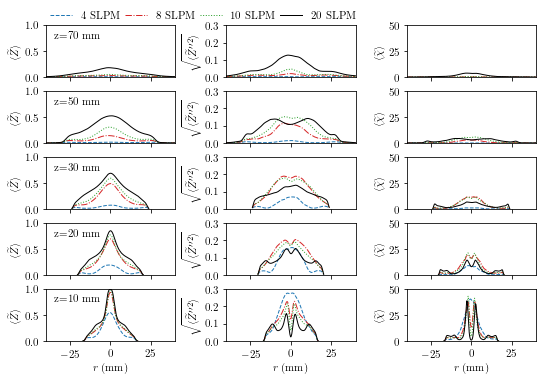

In [9]:
fig, ax = plt.subplots( nrows, ncols, sharex = True, sharey = 'col',
                        figsize = cm2inch( plot_width, plot_height ) )

for i, case in enumerate(cases):
        
    for j, loc in enumerate(locs):
        
        filename = '{}{:d}/sample_lines/z{:d}.csv'.format(folderNamePrefix, case, loc)
        data = np.genfromtxt(filename, delimiter=',', names=True)
        
        r = data['Points0']*1000
        
        for k, var in enumerate(varnames):
            v = data[var]
            
            if k == 1:
                v = np.sqrt(v)
        
            ax[j,k].plot(r, v, c=linecolor[i], ls=linestyle[i], lw=1, label='{:d} SLPM'.format(case))
    
for j, loc in enumerate(locs):
    ax[j,0].set_ylabel(r'$\langle\widetilde{Z}\rangle$')
    ax[j,1].set_ylabel(r'$\sqrt{\langle\widetilde{Z}^{\prime\prime 2}\rangle}$')
    ax[j,2].set_ylabel(r'$\langle\widetilde{\chi}\rangle$')
    ax[j,0].text(-35,0.75,'z={:d} mm'.format(loc))
    
    
ax[0,0].set_xlim([-40, 40])
ax[0,0].set_ylim([0, 1])
ax[0,1].set_ylim([0, 0.3])
ax[0,2].set_ylim([0, 50])

ax[0,1].set_yticks(np.linspace(0,0.3,num=4))

for k in range(3):
    ax[-1,k].set_xlabel(r'$r\;(\mathrm{mm})$')

ax[0,0].legend(loc=(0,1),ncol=4, columnspacing=0.4, frameon=False)
    
fig.subplots_adjust(
        left = margin_left/plot_width,
        bottom = margin_bottom/plot_height,
        right = 1.0-margin_right/plot_width,
        top = 1.0-margin_top/plot_height,
        wspace = space_width/subplot_width,
        hspace = space_height/subplot_height
        )

In [10]:
fig.savefig('fig_multi_radial_Z.eps')
fig.savefig('fig_multi_radial_Z.pdf')